<a href="https://colab.research.google.com/github/chirusainanda/Data-Cleaning/blob/main/task_7_sales_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3

# Connect to SQLite database (creates it if it doesn't exist)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create 'sales' table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sales_data = [
    ('Apple', 10, 2.0),
    ('Banana', 5, 1.5),
    ('Orange', 8, 1.8),
    ('Apple', 15, 2.0),
    ('Banana', 10, 1.5),
    ('Orange', 12, 1.8),
    ('Grapes', 20, 2.5),
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sales_data)

conn.commit()
conn.close()
print("✅ sales_data.db created successfully.")


✅ sales_data.db created successfully.


  product  total_quantity  total_revenue
0   Apple              25           50.0
1  Banana              15           22.5
2  Grapes              20           50.0
3  Orange              20           36.0


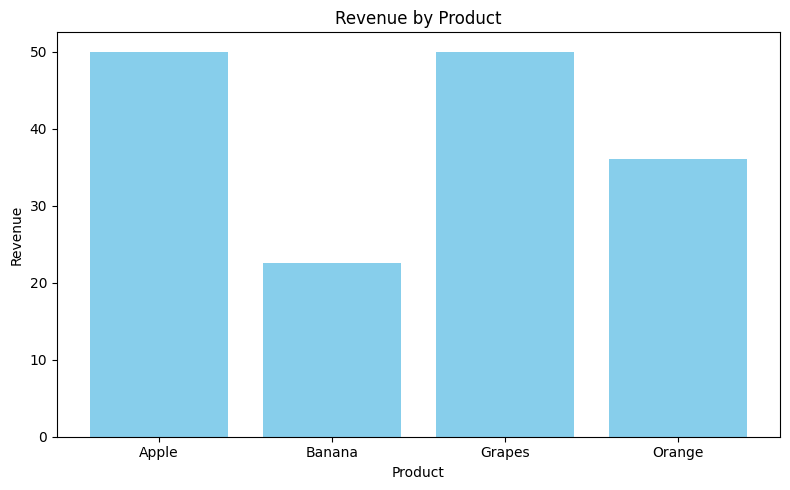

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the database
conn = sqlite3.connect("sales_data.db")

# Step 2: SQL Query to summarize total quantity and revenue per product
query = """
SELECT
  product,
  SUM(quantity) AS total_quantity,
  SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""

# Step 3: Load results into a DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Step 4: Display summary
print(df)

# Step 5: Plot the results
plt.figure(figsize=(8, 5))
plt.bar(df["product"], df["total_revenue"], color="skyblue")
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
